In [1]:
%run ../convention.ipynb

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# Problem 1

<h2>Task</h2>
Train and fine-tune a Decision Tree for the moons dataset using <code>make_moons(n_samples=10000, noise=0.4)</code>
<p class = 'note'> You should get roughly 85% to 87%
accuracy on the test set</p>
<h2>Solution</h2>

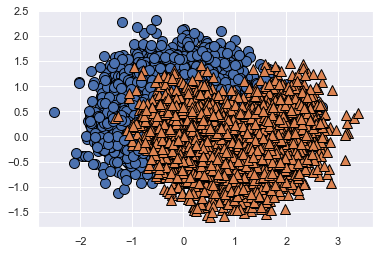

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
X, y = make_moons(n_samples = 10000, noise = .4, random_state = 4)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .8, random_state = 42)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

In [4]:
grid_params = {
    'max_depth' : [3,4,5,6,7,8],
    'max_leaf_nodes' : [10, 20, 30, 40],
    'min_samples_split' : [5, 10, 15, 20]
}

grid = GridSearchCV(DecisionTreeClassifier(), grid_params, cv = 5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8],
                         'max_leaf_nodes': [10, 20, 30, 40],
                 

In [7]:
'Best cross-validation score: {}'.format(grid.best_score_)

'Best cross-validation score: 0.85575'

In [6]:
grid.best_params_

{'max_depth': 3, 'max_leaf_nodes': 10, 'min_samples_split': 5}

In [8]:
'Test score: {}'.format(grid.score(X_test, y_test))

'Test score: 0.8685'

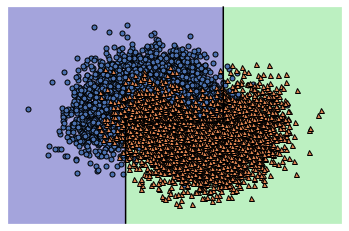

In [13]:
clf = grid.best_estimator_
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, s = 5)
mglearn.plots.plot_2d_classification(clf, X_train, alpha = .3)
mglearn.plots.plot_2d_separator(clf, X_train)

# Problem 2

<h2>Task</h2>
Train a Random Forest on the above dataset
<h2>Solution</h2>

In [15]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

'Test score: {}'.format(clf.score(X_test, y_test))

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


'Test score: 0.851'

Not so good!Let's try to tune the parameters of <code>RandomForestClassifier</code>

In [21]:
grid_params = {
    'max_depth' : [2,3,4],
    'min_samples_split' : [2,3,4,5]
}

grid = GridSearchCV(RandomForestClassifier(n_estimators = 100), grid_params, cv = 5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [19]:
grid.best_score_

0.854625

In [20]:
grid.score(X_test, y_test)

0.863